In [14]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix

characters = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789!@#$%^&()')
# Parameters
image_size = (200, 200)
input_shape = (*image_size, 4)  # 4 for RGBA
n_classes = len(characters)
batch_size = 8 
epochs = 7

# Load the image data
image_files = []
labels = []
numbers = [.25, 1,2,3,4,5]
for char in characters:
    for num in numbers:
        filename = f'distorted_outlined_{char}_{num}.png'
        if os.path.exists(filename):
            img = load_img(filename, target_size=image_size, color_mode='rgba')
            img_array = img_to_array(img)
            image_files.append(img_array)
            labels.append(char)
        else:
            print(f"File not found: {filename}")
encoder = OneHotEncoder(categories=[characters], handle_unknown='ignore')

labels = np.array(labels).reshape(-1, 1)
labels = encoder.fit_transform(labels).toarray()

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(image_files, labels, test_size=0.34, random_state=42, stratify=labels)



# Build the model with increased complexity and regularization
model = keras.models.Sequential([
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(n_classes, activation='softmax')
])

# Compile the model with a lower learning rate
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1)

model.fit(np.array(X_train), np.array(y_train), batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(np.array(X_test), np.array(y_test)),
          callbacks=[early_stopping])

# Evaluate the model
score = model.evaluate(np.array(X_test), np.array(y_test), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.save('trained_model.h5')

y_pred = model.predict(np.array(X_test))
predicted_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels back to original labels
true_classes = np.argmax(np.array(y_test), axis=1)

# Compute the confusion matrix
confusion_mat = confusion_matrix(true_classes, predicted_classes)

# Convert predicted_classes and true_classes back to one-hot-encoded form
predicted_classes_onehot = keras.utils.to_categorical(predicted_classes, num_classes=n_classes)
true_classes_onehot = keras.utils.to_categorical(true_classes, num_classes=n_classes)

# Inverse transform the labels
predicted_classes_labels = encoder.inverse_transform(predicted_classes_onehot)
true_classes_labels = encoder.inverse_transform(true_classes_onehot)

# Map from index to original labels
index_to_label_map = {i: char for i, char in enumerate(characters)}

predicted_classes_labels = [index_to_label_map[i] for i in predicted_classes]
true_classes_labels = [index_to_label_map[i] for i in true_classes]

# Compute the confusion matrix with original labels
confusion_mat_labels = confusion_matrix(true_classes_labels, predicted_classes_labels)

# Print the confusion matrix
import numpy as np

# Assuming 'confusion_mat' is the confusion matrix
np.set_printoptions(threshold=np.inf)  # Set the threshold to infinity to print the entire matrix
print("Confusion Matrix:")
print(confusion_mat_labels)


Epoch 1/7


C:\Users\lbowe\AppData\Roaming\Python\Python38\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


23/23 [==============================] - 48s 2s/step - loss: 49.3513 - accuracy: 0.1067 - val_loss: 2.6570 - val_accuracy: 0.6739
Epoch 2/7
23/23 [==============================] - 46s 2s/step - loss: 1.5300 - accuracy: 0.6124 - val_loss: 0.3662 - val_accuracy: 0.9130
Epoch 3/7
23/23 [==============================] - 48s 2s/step - loss: 0.5755 - accuracy: 0.8371 - val_loss: 0.3316 - val_accuracy: 0.9239
Epoch 4/7
23/23 [==============================] - 47s 2s/step - loss: 0.1718 - accuracy: 0.9326 - val_loss: 0.1548 - val_accuracy: 0.9674
Epoch 5/7
23/23 [==============================] - 48s 2s/step - loss: 0.1350 - accuracy: 0.9607 - val_loss: 0.1491 - val_accuracy: 0.9457
Epoch 6/7
23/23 [==============================] - 46s 2s/step - loss: 0.1320 - accuracy: 0.9494 - val_loss: 0.1247 - val_accuracy: 0.9457
Epoch 7/7
23/23 [==============================] - 46s 2s/step - loss: 0.0490 - accuracy: 0.9831 - val_loss: 0.1475 - val_accuracy: 0.9457
Test loss: 0.14754487574100494
Test 

In [12]:
print(len([0 ,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
  0 ,0 ,0 ,0, 0 ,0 ,0 ,0 ,2]))

45


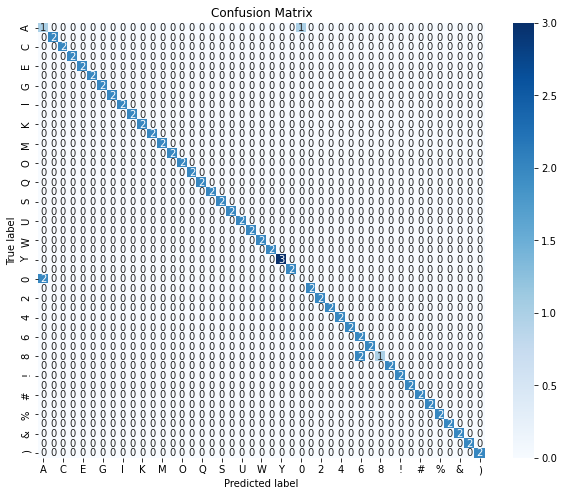

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert your confusion matrix to DataFrame for better visual
confusion_df = pd.DataFrame(confusion_mat_labels, index=characters, columns=characters)

plt.figure(figsize=(10,8))
sns.heatmap(confusion_df, annot=True, cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()


In [16]:

print(encoder.categories_)
#print(len(labels[:10]))
print(labels[:10])
print(np.unique(y_train, axis=0))
print(np.unique(y_test, axis=0))


#print(np.unique(predicted_classes, return_counts=True))

unique, counts = np.unique(predicted_classes, return_counts=True)
print(dict(zip(unique, counts)))
unique, counts = np.unique(np.argmax(y_train, axis=1), return_counts=True)
print(dict(zip(unique, counts)))

unique, counts = np.unique(np.argmax(y_test, axis=1), return_counts=True)
print(dict(zip(unique, counts)))
unique, counts = np.unique(predicted_classes, return_counts=True)
print(dict(zip(unique, counts)))

for index, label in enumerate(encoder.categories_[0]):
    print(f"Index {index} corresponds to label '{label}'")






[array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
       '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '!', '@', '#',
       '$', '%', '^', '&', '(', ')'], dtype='<U1')]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [19]:
print(f"Number of unique labels before any transformation: {len(labels)}")


print(f"Number of unique classes in y_train before one-hot encoding: {len(y_train)}")
print(f"Number of unique classes in y_test before one-hot encoding: {len(y_test)}")


from sklearn.metrics import classification_report

# Assume that you already have 'true_classes' and 'predicted_classes' as defined in your previous code
true_classes_labels = [index_to_label_map[i] for i in true_classes]
predicted_classes_labels = [index_to_label_map[i] for i in predicted_classes]

# Print out the classification report
print(classification_report(true_classes_labels, predicted_classes_labels, target_names=characters))


Number of unique labels before any transformation: 270
Number of unique classes in y_train before one-hot encoding: 178
Number of unique classes in y_test before one-hot encoding: 92
              precision    recall  f1-score   support

           A       0.33      0.50      0.40         2
           B       1.00      1.00      1.00         2
           C       1.00      1.00      1.00         2
           D       1.00      1.00      1.00         2
           E       1.00      1.00      1.00         2
           F       1.00      1.00      1.00         2
           G       1.00      1.00      1.00         2
           H       1.00      1.00      1.00         2
           I       1.00      1.00      1.00         2
           J       1.00      1.00      1.00         2
           K       1.00      1.00      1.00         2
           L       1.00      1.00      1.00         2
           M       1.00      1.00      1.00         2
           N       1.00      1.00      1.00         2
      

1/1 [==============================] - 2s 2s/step
Predicted Label: Y
Predicted Probabilities:
A: 0.02202165313065052
B: 0.02232482098042965
C: 0.02185051329433918
D: 0.022235523909330368
E: 0.022146696224808693
F: 0.022542668506503105
G: 0.022256970405578613
H: 0.022368967533111572
I: 0.02247733622789383
J: 0.022380398586392403
K: 0.021999333053827286
L: 0.022460585460066795
M: 0.022472770884633064
N: 0.022297266870737076
O: 0.022132955491542816
P: 0.022118018940091133
Q: 0.021993711590766907
R: 0.022261863574385643
S: 0.022154029458761215
T: 0.022652652114629745
U: 0.022209327667951584
V: 0.022065429016947746
W: 0.022149289026856422
X: 0.022157056257128716
Y: 0.022775642573833466
Z: 0.022338714450597763
0: 0.02203119732439518
1: 0.022362565621733665
2: 0.022029800340533257
3: 0.022160455584526062
4: 0.021731121465563774
5: 0.022180261090397835
6: 0.022008515894412994
7: 0.02238968387246132
8: 0.02212165854871273
9: 0.0219782292842865
!: 0.02273997664451599
@: 0.021889088675379753
#: 0

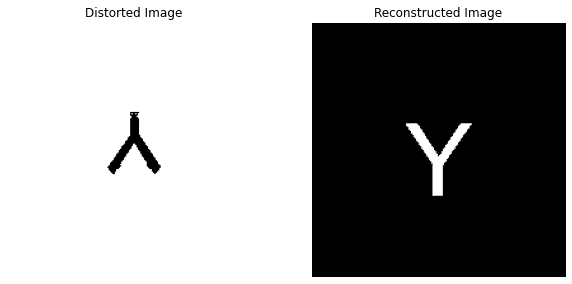

In [18]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Parameters
characters = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789!@#$%^&()')
image_size = (200, 200)
input_shape = (*image_size, 4)  # 4 for RGBA
n_classes = len(characters)

# Load the trained model
model = keras.models.load_model('trained_model.h5')  # Replace 'trained_model.h5' with your trained model file

# Load the distorted image
distorted_image_path = 'distorted_outlined_Y_4.png'  # Replace with the path to your distorted image
distorted_image = load_img(distorted_image_path, target_size=image_size, color_mode='rgba')
distorted_image_array = img_to_array(distorted_image)
distorted_image_array = distorted_image_array.reshape(1, *distorted_image_array.shape)

# Normalize the pixel values
distorted_image_array = distorted_image_array / 255.0

# Predict the label for the distorted image
predicted_labels = model.predict(distorted_image_array)
predicted_label_index = np.argmax(predicted_labels)
predicted_label = characters[predicted_label_index]


print('Predicted Label:', predicted_label)
print('Predicted Probabilities:')
for i in range(n_classes):
    print(f'{characters[i]}: {predicted_labels[0][i]}')
    # Load the corresponding original image
original_image_path = f'outlined_letter_{predicted_label}.png'  # Replace with the path to your original image directory
original_image = load_img(original_image_path, target_size=image_size, color_mode='rgba')
original_image_array = img_to_array(original_image)
inverted_image_array = 255 - original_image_array.astype(np.uint8)    
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(distorted_image)
axes[0].set_title('Distorted Image')
axes[0].axis('off')
axes[1].imshow(inverted_image_array)
axes[1].set_title('Reconstructed Image')
axes[1].axis('off')
plt.show()
